In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import time
import matplotlib.pyplot as plt
import seaborn as sb
import random
import time
import sklearn as skl
import matplotlib.dates as mdates
import datetime as dt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

C:\Users\saulg\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\saulg\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\saulg\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the nump

In [2]:
df = pd.read_csv("test data.csv")
snow = pd.read_csv("Snowstorms.csv")
df = df.dropna()
dba = pd.read_csv('Agriculture/DBA.csv', delimiter = ',')
#sp500 = pd.read_csv("sptest.csv")

C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.994006,0.995886,0.991455,0.991455,0.233662
High,0.994006,1.000000,0.995778,0.996697,0.996697,0.225222
Low,0.995886,0.995778,1.000000,0.996380,0.996380,0.221782
Close,0.991455,0.996697,0.996380,1.000000,1.000000,0.220867
Adj Close,0.991455,0.996697,0.996380,1.000000,1.000000,0.220867
Volume,0.233662,0.225222,0.221782,0.220867,0.220867,1.000000


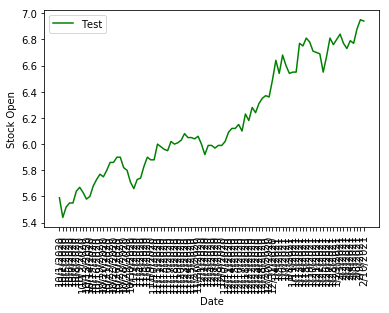

In [3]:
plt.plot(df['Date'],df['Open'],color = "Green", label= "Test")
plt.legend()
plt.xlabel("Date")
plt.xticks(rotation = 90)
plt.ylabel("Stock Open")
df.corr()

In [5]:
const = sm.add_constant(df["Open"].tolist())
model = sm.OLS(df["Open"].tolist(),df["High"])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.627e+06
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                   2.27e-193
Time:                        19:53:18   Log-Likelihood:                          151.15
No. Observations:                  91   AIC:                                     -300.3
Df Residuals:                      90   BIC:                                     -297.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
High           0.9938      0.001   1275.385      0.000       0.992       0.995
==============================================================================
Omnibus:                       75.793   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.745
Skew:                          -2.610   Prob(JB):                    1.16e-124
Kurtosis:                      14.103   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


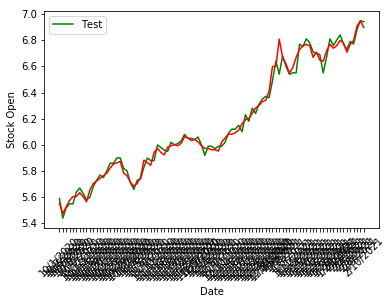

In [6]:
plt.plot(df['Date'],df['Open'],color = "Green", label= "Test")
plt.legend()
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.ylabel("Stock Open")
df.corr()
plt.plot(df["Date"],results.predict(),color = "red")

In [5]:
model = sm.OLS(dba["Open"].tolist(),dba["High"])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.604e+07
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                        0.00
Time:                        19:49:53   Log-Likelihood:                          1289.5
No. Observations:                3798   AIC:                                     -2577.
Df Residuals:                    3797   BIC:                                     -2571.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
High           0.9939      0.000   8720.201      0.000       0.994       0.994
==============================================================================
Omnibus:                     3292.916   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117514.587
Skew:                          -4.039   Prob(JB):                         0.00
Kurtosis:                      29.026   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
plt.plot(dba['Date'],dba['Open'],color = "Green", label= "Test")
plt.legend()
plt.xlabel("Date")
plt.xticks(rotation = 90)
plt.ylabel("Stock Open")
df.corr()
plt.plot(dba["Date"],results.predict(),color = "red")

C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\saulg\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
